# Radau IIA method ($s=3$, order 5)

In [1]:
using Autoreload
import Logging
using Plots
pyplot()
IJulia.clear_output(false)

In [2]:
arequire("RadauBVP")
IJulia.clear_output(false)

In [3]:
Logging.configure(level=Logging.INFO)

Logger(root,INFO,Union{IO,Logging.SysLog}[Base.PipeEndpoint(open, 0 bytes waiting)],root)

# Test the solver

Test case problem: simple oscilator

$$
\ddot{y} = -y
$$

Put in the form:

\begin{align*}
\dot{y} &= v\\
\dot{v} &= -y
\end{align*}

And let's formulate it as BVP: $t=0,...,\pi$ and $y(0) = 0$ and $v(\pi) = -1$. Solution of this equation is

$$y=\sin{t}\quad v = \cos{t}$$

Denote $\boldsymbol{Y} = [y, v]$. Then

\begin{align*}
\dot{Y}_1 &= Y_2\\
\dot{Y}_2 &= -Y_1
\end{align*}

And BC:

\begin{align*}
Y_1(0) - 0 &= 0\\
Y_2(\pi)+1 &= 0
\end{align*}

Jacobian of ODE equation:

$$
J_{\text{ODE}} = \left(
\begin{array}{cc}
0 & 1\\
-1 & 0
\end{array}\right)
$$

Jacobian of BC:

$$
J_{\text{BC}} = \left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}\right)
$$

In [4]:
function bc!(y0, yn, r)
    r[1] = y0[1] - 0.0
    r[2] = yn[2] - (-1.0)
end

function dbc!(y0, yn, jac)
    jac[:,:] = 0.0
    jac[1,1] = 1.0
    jac[2,4] = 1.0
end

function odeeq!(t, y, dydt)
    dydt[1] = y[2]
    dydt[2] = -y[1]
end

function dodeeq!(t, y, jac)
    jac[1,1] = 0.0
    jac[1,2] = 1.0
    jac[2,1] = -1.0
    jac[2,2] = 0.0
end

dodeeq! (generic function with 1 method)

In [75]:
nt = 5
const y0 = zeros(Float64, (2, 3*(nt-1)+1))

2×13 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [76]:
for n=1:3*(nt-1)+1
    y0[:, n] = [0.0, 1.0]
end

@time (conv, ttot, ytot, result) = RadauBVP.radau3(bc!, odeeq!, dbc!, dodeeq!, y0, 0.0, convert(Float64, π))

  0.052943 seconds (7.55 k allocations: 916.563 KB)


(true,[0.0,0.121777,0.506542,0.785398,0.907175,1.29194,1.5708,1.69257,2.07734,2.35619,2.47797,2.86274,3.14159],
[0.0 0.121714 … 0.275135 1.7115e-5; 1.00013 0.993077 … -0.961089 -1.0],

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0]
 * Zero: [0.0,1.00013,0.121714,0.993077,0.485099,0.874219,0.70717,0.707176,0.788249,0.616131,0.961152,0.275145,1.00006,8.55801e-6,0.993016,-0.121698,0.874168,-0.485061,0.707138,-0.70712,0.616099,-0.788194,0.275135,-0.961089,1.7115e-5,-1.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 2
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 3
 * Jacobian Calls (df/dx): 3)

In [78]:
yres = ytot[1,:]
vres = ytot[2,:]
nothing

In [31]:
let t = linspace(0.0, π, 100)
    
    global possol = sin.(t)
    global vsol = cos.(t)
    global ysol = Array(Float64, 2*100)
    
    ysol[1:2:end-1] = possol
    ysol[2:2:end] = vsol
end
nothing


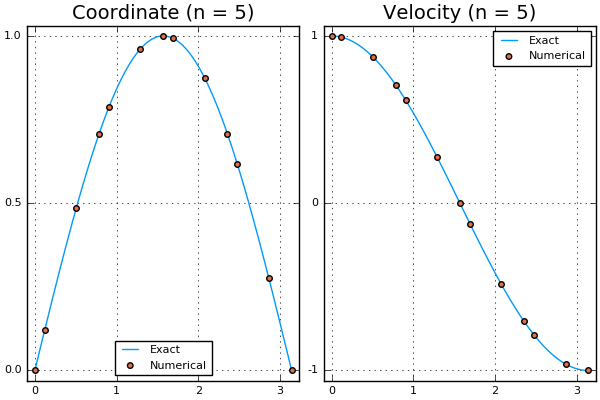

In [79]:
p1 = plot(
linspace(0.0, π, 100),
possol,
title = "Coordinate (n = $nt)",
label = "Exact")
plot!(ttot, yres, label = "Numerical", linetype = :scatter)

p2 = plot(
linspace(0.0, π, 100),
vsol,
title = "Velocity (n = $nt)",
label = "Exact")
plot!(ttot, vres, label = "Numerical", linetype = :scatter)

plot(p1,p2)
